In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization,Convolution2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import keras
import os
tf.__version__

'2.9.1'

In [2]:
DATA_DIR = 'E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/'
SIZE = 64
dataset_image = []
label = []

In [3]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')

In [4]:
for i, img_name in enumerate(parasitized_images):
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(DATA_DIR + 'Parasitized/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset_image.append(np.array(image))
        label.append(0)

In [5]:
uninfected_images = os.listdir(DATA_DIR+"Uninfected/")

In [6]:
for i, image_name in enumerate(uninfected_images):
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(DATA_DIR + 'Uninfected/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset_image.append(np.array(image))
        label.append(1)

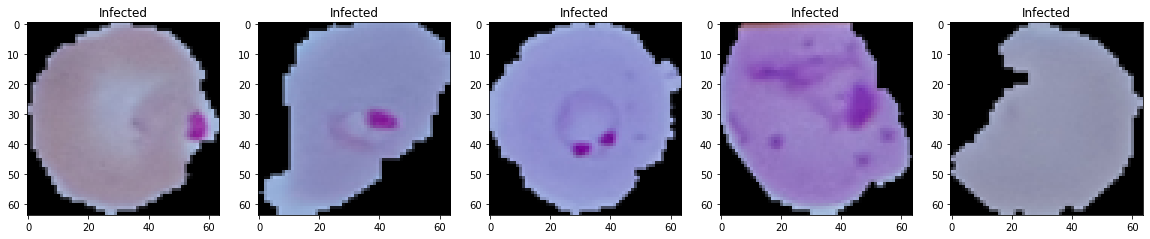

In [7]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset_image[image_index])
    plt.title('Infected')

In [ ]:
# Inspect few Uninfected classified images
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset_image[len(parasitized_images) + image_index])
    plt.title('Uninfected')

Train And Test Dataset

In [ ]:
data_generator = ImageDataGenerator(rescale= 1/255.0,
                                        shear_range = 0.2,
                                        horizontal_flip = True,
                                        zoom_range = 0.2,
                                        validation_split=0.2
                                        )

In [6]:
train_dataset = data_generator.flow_from_directory('E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images',
                                                       target_size = (64,64),
                                                       batch_size = 64,
                                                       class_mode = 'categorical',
                                                       subset='training')

Found 22048 images belonging to 2 classes.


In [7]:
test_set = data_generator.flow_from_directory('E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 5510 images belonging to 2 classes.


Custom CNN Model

In [8]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))


classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))


classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))

In [9]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [10]:
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0

In [ ]:
pip install visualkeras
import visualkeras

In [ ]:
visualkeras.layered_view(classifier,to_file='output.png').show()
visualkeras.layered_view(classifier)

In [11]:
history = classifier.fit_generator(
  train_dataset,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(test_set)
)

C:\Users\User\AppData\Local\Temp\ipykernel_3636\746144631.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/50
 20/345 [>.............................] - ETA: 14:38 - loss: 1.0772 - accuracy: 0.5867

In [ ]:
# ploting the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')